<a href="https://colab.research.google.com/github/jayy1809/Ahmedabad-house-renting/blob/main/housing3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [19]:
df = pd.read_csv('ahmedabad-gandhinagar-housing.csv')

In [20]:
print(df.shape)

(3918, 15)


In [21]:
df.head()

,property_price,property_bhk,property_sqft,property_city,property_locality,property_developer,is_furnished,num_of_lifts,num_of_carparkings,property_project,num_of_baths,num_of_balconies,bechelors_or_family,floornumber,totalfloor
0,27000.0,3.0,2211,Ahmedabad,Sarkhej Gandhinagar Highway,Godrej Properties,Semi-Furnished,2.0,NaN,Pinecrest Godrej Garden City,3.0,NaN,Family,5.0,22.0
1,180000.0,4.0,5400,Ahmedabad,Shilaj,NaN,Furnished,NaN,3.0,NaN,4.0,1.0,Family,NaN,NaN
2,32000.0,3.0,2013,Ahmedabad,Sardar Patel Ring Road,Goyal & Co and HN Safal,Semi-Furnished,3.0,NaN,Orchid Legacy,3.0,1.0,Bachelors/Family,5.0,16.0
3,120000.0,4.0,3500,Ahmedabad,Satellite,Iris Build Cone,Furnished,2.0,NaN,Iris Exotica,4.0,1.0,Family,8.0,14.0
4,35000.0,3.0,1472,Ahmedabad,Shela,GSG Abode LLP,Furnished,2.0,NaN,Orchid Sky,3.0,1.0,Family,9.0,12.0


In [22]:
df = df.rename(columns={'bechelors_or_family': 'bachelors_or_family'})

In [23]:
df['property_sqft'] = df['property_sqft'].str.replace(',', '').astype(float)

In [24]:
df['property_locality'] = df['property_locality'].str.split(',').str[-1].str.strip()

In [25]:
df.isnull().sum()

property_price            3
property_bhk             14
property_sqft           189
property_city             0
property_locality       209
property_developer     2083
is_furnished             24
num_of_lifts           2473
num_of_carparkings     2929
property_project       1561
num_of_baths            308
num_of_balconies       2125
bachelors_or_family       0
floornumber             471
totalfloor              425
dtype: int64

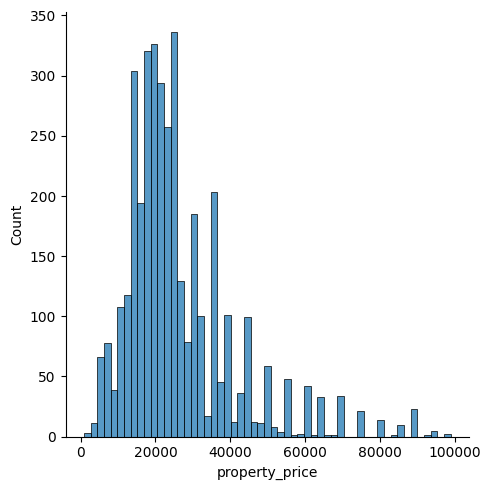

In [26]:
sns.displot(df.property_price[df.property_price < 100000],kde=False)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3918 entries, 0 to 3917
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_price       3915 non-null   float64
 1   property_bhk         3904 non-null   float64
 2   property_sqft        3729 non-null   float64
 3   property_city        3918 non-null   object 
 4   property_locality    3709 non-null   object 
 5   property_developer   1835 non-null   object 
 6   is_furnished         3894 non-null   object 
 7   num_of_lifts         1445 non-null   float64
 8   num_of_carparkings   989 non-null    float64
 9   property_project     2357 non-null   object 
 10  num_of_baths         3610 non-null   float64
 11  num_of_balconies     1793 non-null   float64
 12  bachelors_or_family  3918 non-null   object 
 13  floornumber          3447 non-null   float64
 14  totalfloor           3493 non-null   float64
dtypes: float64(9), object(6)
memory usage:

In [28]:
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, 100*(np.round(df[feature].isnull().mean(), 4)),  ' % missing values')


property_price 0.08  % missing values
property_bhk 0.36  % missing values
property_sqft 4.82  % missing values
property_locality 5.33  % missing values
property_developer 53.16  % missing values
is_furnished 0.61  % missing values
num_of_lifts 63.12  % missing values
num_of_carparkings 74.76  % missing values
property_project 39.839999999999996  % missing values
num_of_baths 7.86  % missing values
num_of_balconies 54.24  % missing values
floornumber 12.02  % missing values
totalfloor 10.85  % missing values


In [29]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
 df[col] = df[col].str.lower().str.replace(' ', '_')

In [30]:
df.nunique()

property_price         251
property_bhk             8
property_sqft          718
property_city            2
property_locality      196
property_developer     308
is_furnished             3
num_of_lifts             7
num_of_carparkings       7
property_project       802
num_of_baths             6
num_of_balconies         1
bachelors_or_family      3
floornumber             19
totalfloor              27
dtype: int64

In [31]:
df['num_of_lifts'].median()

2.0

In [32]:
data = df.copy()
data.num_of_lifts = data.num_of_lifts.fillna(2)


In [33]:
del data['num_of_carparkings']

In [34]:
del data['property_developer']

In [37]:
data['num_of_balconies'].median()

1.0

In [38]:
data.num_of_balconies = data.num_of_balconies.fillna(1)

In [40]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']

In [41]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(data[feature].unique())))

The feature is property_city and number of categories are 2
The feature is property_locality and number of categories are 197
The feature is is_furnished and number of categories are 4
The feature is property_project and number of categories are 803
The feature is bachelors_or_family and number of categories are 3


In [42]:
features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

def replace_cat_feature(dataset,features_nan):
    data2=dataset.copy()
    data2[features_nan]=data2[features_nan].fillna('missing')
    return data2

data=replace_cat_feature(data,features_nan)

data[features_nan].isnull().sum()

property_locality    0
is_furnished         0
property_project     0
dtype: int64

In [43]:
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()

    ## create a new feature to capture nan values
    # here if it has null values replace it with 1 in new column else 0 so we can see which values we added which were null before
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)

data[numerical_with_nan].isnull().sum()

property_price    0
property_bhk      0
property_sqft     0
num_of_baths      0
floornumber       0
totalfloor        0
dtype: int64

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
df_train_full2 , df_test2 = train_test_split(data, test_size=0.2, random_state=42)

In [47]:
df_train , df_val = train_test_split(df_train_full2, test_size = 0.25, random_state = 42)

In [48]:
y_train = df_train.property_price.values
y_val = df_val.property_price.values

In [49]:
del df_train['property_price']
del df_val['property_price']


In [50]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

numerical_features2 = [feature for feature in df_train.columns if df_train[feature].dtypes!='O']

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42))
feature_sel_model.fit(df_train[numerical_features2], y_train)

feature_sel_model.get_support()

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True])

In [52]:
# df_train.head()
df_train.columns

Index(['property_bhk', 'property_sqft', 'property_city', 'property_locality',
       'is_furnished', 'num_of_lifts', 'property_project', 'num_of_baths',
       'num_of_balconies', 'bachelors_or_family', 'floornumber', 'totalfloor',
       'property_pricenan', 'property_bhknan', 'property_sqftnan',
       'num_of_bathsnan', 'floornumbernan', 'totalfloornan'],
      dtype='object')

In [53]:
df_train.drop(columns=['is_furnished'], inplace=True)
df_val.drop(columns=['is_furnished'], inplace=True)

In [54]:
dict_train = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')


In [55]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees (you can adjust this)
    random_state=42 ,   # Random seed for reproducibility
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)


rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
print(f"RandomForestRegressor RMSE: {rmse_rf}")
print(f"RandomForestRegressor MAE: {mae_rf}")

RandomForestRegressor RMSE: 87794.76931884106
RandomForestRegressor MAE: 12671.78058956916


In [72]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

xgb_model = XGBRegressor(
    n_estimators=100,  # Number of boosting rounds (you can adjust this)
    learning_rate=0.1,  # Learning rate (you can adjust this)
    max_depth=3,  # Maximum depth of trees (you can adjust this)
    random_state=42  # Random seed for reproducibility
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)

rmse_xgb = mean_squared_error(y_val, y_pred_xgb, squared=False)
mae_xgb = mean_absolute_error(y_val, y_pred_xgb)
print(f"Root Mean Squared Error , XGB (RMSE): {rmse_xgb}")
print(f"Root Mean Squared Error , XGB (MAE): {mae_xgb}")

Root Mean Squared Error , XGB (RMSE): 90808.6928696567
Root Mean Squared Error , XGB (MAE): 15019.726498506507


In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 3]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for prediction
y_pred_grid = best_model.predict(X_val)

In [75]:
rmse_xgb = mean_squared_error(y_val, y_pred_grid, squared=False)
mae_xgb = mean_absolute_error(y_val, y_pred_grid)
print(f"Root Mean Squared Error , XGB (RMSE): {rmse_xgb}")
print(f"Root Mean Squared Error , XGB (MAE): {mae_xgb}")

# hence we were able to reduc MAE in our model good goood

Root Mean Squared Error , XGB (RMSE): 83206.59404656694
Root Mean Squared Error , XGB (MAE): 12574.66893306022


In [114]:

data = df.copy()
del data['num_of_lifts']
del data['property_developer']
del data['num_of_balconies']
del data['num_of_carparkings']

# data['bath/bed'] = data['num_of_baths']/data['property_bhk']
# data['bedsqft'] = data['property_sqft']/ data['property_bhk'] # uselesss

categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']

features_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes=='O']

def replace_cat_feature(dataset,features_nan):
    data2=dataset.copy()
    data2[features_nan]=data2[features_nan].fillna('missing')
    return data2

data=replace_cat_feature(data,features_nan)

data[features_nan].isnull().sum()

numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()

    ## create a new feature to capture nan values
    # here if it has null values replace it with 1 in new column else 0 so we can see which values we added which were null before
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)

data[numerical_with_nan].isnull().sum()

from sklearn.model_selection import train_test_split

df_train_full2 , df_test2 = train_test_split(data, test_size=0.2, random_state=42)

df_train , df_val = train_test_split(df_train_full2, test_size = 0.25, random_state = 42)

y_train = df_train.property_price.values
y_val = df_val.property_price.values

del df_train['property_price']
del df_val['property_price']

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

numerical_features2 = [feature for feature in df_train.columns if df_train[feature].dtypes!='O']

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=42))
feature_sel_model.fit(df_train[numerical_features2], y_train)

feature_sel_model.get_support()




array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [115]:
df_train.columns

Index(['property_bhk', 'property_sqft', 'property_city', 'property_locality',
       'is_furnished', 'property_project', 'num_of_baths',
       'bachelors_or_family', 'floornumber', 'totalfloor', 'property_pricenan',
       'property_bhknan', 'property_sqftnan', 'num_of_bathsnan',
       'floornumbernan', 'totalfloornan'],
      dtype='object')

In [116]:

df_train.columns

# df_train.drop(columns=['is_furnished'], inplace=True)
# df_val.drop(columns=['is_furnished'], inplace=True)

dict_train = df_train.to_dict(orient = 'records')
dict_val = df_val.to_dict(orient = 'records')

from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse = False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

rf_model = RandomForestRegressor(
    n_estimators=100,  # Number of trees (you can adjust this)
    random_state=42 ,   # Random seed for reproducibility
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)


rmse_rf = mean_squared_error(y_val, y_pred_rf, squared=False)
mae_rf = mean_absolute_error(y_val, y_pred_rf)
print(f"RandomForestRegressor RMSE: {rmse_rf}")
print(f"RandomForestRegressor MAE: {mae_rf}")


RandomForestRegressor RMSE: 70765.07106831926
RandomForestRegressor MAE: 11050.61886094914
